<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сборный-проект-№-2.-Анализ-мобильного-приложения" data-toc-modified-id="Сборный-проект-№-2.-Анализ-мобильного-приложения-1">Сборный проект № 2. Анализ мобильного приложения</a></span><ul class="toc-item"><li><span><a href="#О-чем-проект" data-toc-modified-id="О-чем-проект-1.1">О чем проект</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.2">Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3">Предобработка данных</a></span></li><li><span><a href="#Изучение-и-проверка-данных" data-toc-modified-id="Изучение-и-проверка-данных-1.4">Изучение и проверка данных</a></span><ul class="toc-item"><li><span><a href="#События-и-пользователи" data-toc-modified-id="События-и-пользователи-1.4.1">События и пользователи</a></span></li><li><span><a href="#Временные-параметры" data-toc-modified-id="Временные-параметры-1.4.2">Временные параметры</a></span></li><li><span><a href="#Группы-и-пользователи" data-toc-modified-id="Группы-и-пользователи-1.4.3">Группы и пользователи</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-1.4.4">Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1.5">Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Виды-событий" data-toc-modified-id="Виды-событий-1.5.1">Виды событий</a></span></li><li><span><a href="#Воронка" data-toc-modified-id="Воронка-1.5.2">Воронка</a></span><ul class="toc-item"><li><span><a href="#Порядок-событий-в-воронке" data-toc-modified-id="Порядок-событий-в-воронке-1.5.2.1">Порядок событий в воронке</a></span></li><li><span><a href="#Расчет-конверсии-по-воронке" data-toc-modified-id="Расчет-конверсии-по-воронке-1.5.2.2">Расчет конверсии по воронке</a></span></li></ul></li></ul></li><li><span><a href="#A/A/B-тестирование" data-toc-modified-id="A/A/B-тестирование-1.6">A/A/B-тестирование</a></span><ul class="toc-item"><li><span><a href="#A/A-тестирование" data-toc-modified-id="A/A-тестирование-1.6.1">A/A-тестирование</a></span></li><li><span><a href="#A/B-тестирование" data-toc-modified-id="A/B-тестирование-1.6.2">A/B-тестирование</a></span></li><li><span><a href="#Пояснения-к-проведению-тестирования" data-toc-modified-id="Пояснения-к-проведению-тестирования-1.6.3">Пояснения к проведению тестирования</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-1.7">Выводы и рекомендации</a></span></li></ul></li></ul></div>

# Сборный проект № 2. Анализ мобильного приложения

## О чем проект

Нам предстоит изучить работу мобильного приложения стартапа, который продаёт продукты питания. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение, основанное на данных - по результатам A/A/B-теста.

**Цели исследования:**
1. Изучить воронку продаж. Определим, как пользователи доходят до покупки.
2. Исследовать результаты A/A/B-эксперимента по замене шрифта. Пользователи разделены на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выяснить, какой шрифт лучше.

**Этапы исследования:**
1. Обзор данных
2. Предобработка данных
3. Изучение и проверка данных
4. Исследовательский анализ метрик
5. Оценка результатов A/A/B теста 
6. Подведение итогов и разработка рекомендаций



## Обзор данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import scipy.stats as stats
import math as mth
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [2]:
#Откроем файл  с данными
try:
    data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')
except:
    data = pd.read_csv('logs_exp.csv', sep='\t')

In [3]:
#Изучим содержимое таблицы с гипотезами
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
#Выведем уникальные значения столбцов EventName и ExpId отдельно
print(data['EventName'].unique())
print(data['ExpId'].unique())

['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']
[246 248 247]


Итак, мы имеем данные, содержащие **информацию о посещениях, параметрах посещений нашего мобильного приложения**. Датасет состоит из 244126 строк и 4 столбцов. 

Названия столбцов:
- EventName	- наименование события: 
        MainScreenAppear - просмотр главный экран
        Tutorial - просмотр обучающей части (онбординг)
        CartScreenAppear - просмотр корзины
        OffersScreenAppear - просмотр предложений 
        PaymentScreenSuccessful - успешная оплата
- DeviceIDHash - уникальный код устройства входа
- EventTimestamp - дата и время захода (в миллисекундах)	
- ExpId - группа эксперимента:
        246, 247 - две контрольные группы A
        248 - экспериментальная группа B

## Предобработка данных

Предобработку проведем в несколько этапов:
- Переименование названий столбцов на змеиный регистр
- Проверка на наличие пропусков
- Изменение формата даты и иных типов данных при необходимости
- Проверка на явные и неявные дубликаты

In [5]:
#Заменим названия столбцов, чтобы они имели нижний регистр и нижнее подчеркивание
data.rename(columns = {'EventName':'event_name',
                       'DeviceIDHash':'device_id_hash',
                       'EventTimestamp':'event_timestamp',
                       'ExpId':'exp_id'}, inplace = True)

In [6]:
#Изучим структуру данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   event_name       244126 non-null  object
 1   device_id_hash   244126 non-null  int64 
 2   event_timestamp  244126 non-null  int64 
 3   exp_id           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


Таблица не имеет пропусков. Все типы данных соответствуют содержанию столбцов, но формат даты представляет собой количество секунд, прошедших с полуночи (00:00:00 UTC) 1 января 1970 года. Надо поменять на более удобный формат.

In [7]:
#Формат даты поменяем на YYYY.MM.DD hh:mm:ss
data['event_timestamp'] = data['event_timestamp'].astype('datetime64[s]')
data.head()

,event_name,device_id_hash,event_timestamp,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [8]:
#Посчитаем число явных дубликатов и выведем их долю
print(data.duplicated().sum())
print(data.duplicated().sum()/data['event_name'].count())

413
0.0016917493425526163


Доля явных дубликатов составляет 0,17% от общего числа логов. Такие дубликаты могли возникнуть по техническим причинам - неверно зафиксированное время, либо фиксация нескольких действий в одну временную метку. Поэтому удалять дубликаты не будем.



Неявные дубликаты могли бы содержаться в столбцах event_name и exp_id, но мы ранее при обзоре данных уже выводили их уникальные значения, так что иожеи утверждать, что неявных дубликатов нет: 

- event_name - наименование события: 
        MainScreenAppear 
        Tutorial 
        CartScreenAppear
        OffersScreenAppear 
        PaymentScreenSuccessful 
- exp_id - группа эксперимента:
        246, 247 - две контрольные группы A
        248 - экспериментальная группа B

In [9]:
#Добавим отдельный столбец с датой (без времени)
data['event_date'] = pd.to_datetime(data['event_timestamp'])
data.head()

,event_name,device_id_hash,event_timestamp,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25 11:48:42


**Итоги предобработки данных:**

- Названия столбцов перевели на змеиный регистр
- Пропуски не выявлены
- Формат даты и времени изменен на YYYY.MM.DD hh:mm:ss, добавлен столбец с датой в формате YYYY.MM.DD
- Выявлены 413 явных дубликатов, их решено оставить; неявных дубликатов нет




## Изучение и проверка данных

### События и пользователи

Изучим по отдельности:
- Сколько всего событий собрано в логе
- Сколько всего пользователей в логе
- Сколько в среднем событий приходится на пользователя

In [10]:
#Посчитаем количество событий по уникальному коду устройства
data['device_id_hash'].count()

244126

In [11]:
#Посчитаем количество уникальных пользователей по уникальному коду устройства
data['device_id_hash'].nunique()

7551

Всего за заданный период приложение собрало 244126 событий, 7551 уникальных пользователей.

In [12]:
#Создадим сводную таблицу по пользователям чтобы посмотреть статистику
user_pivot = data.pivot_table(
    index='device_id_hash', values='event_name', aggfunc='count').reset_index()
print(user_pivot['event_name'].mean())
print(user_pivot['event_name'].median())
print(user_pivot['event_name'].mode())
print(user_pivot['event_name'].max())

32.33028737915508
20.0
0    5
Name: event_name, dtype: int64
2308


В среднем на каждого пользователя приходится 32 события, но медианное значение - 20 событий. Есть пользователи с аномально большим количеством событий, т.к. максимальное количество событий на одного пользователя - 2308. Чаще всего (значение моды) один пользователь прошел через 5 событий. 

Text(0, 0.5, 'Частота наблюдений')

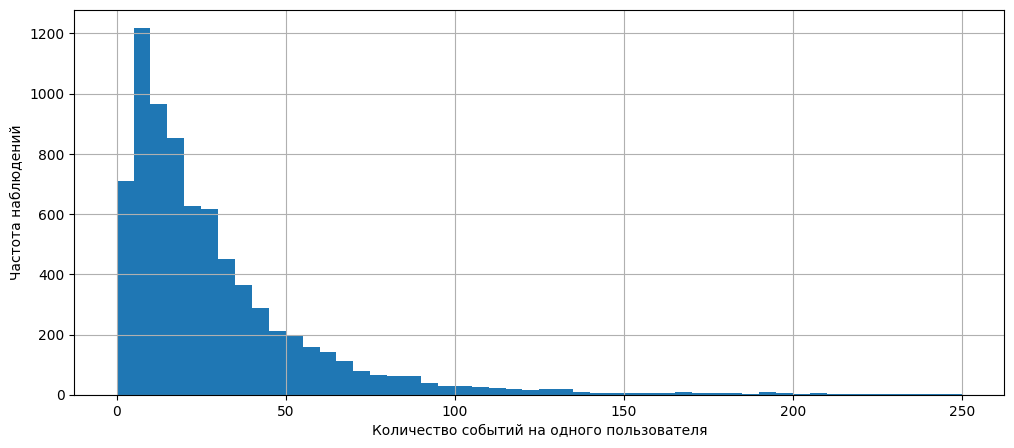

In [13]:
#Проверим как распределены события на пользователей. Сделаем срез от 0 до 250 ед.
plt.figure(figsize=(12,5))
user_pivot['event_name'].hist(range=(0,250), bins=50)
plt.xlabel('Количество событий на одного пользователя')
plt.ylabel('Частота наблюдений')

In [14]:
np.percentile(user_pivot['event_name'], [95,99])

array([ 89. , 200.5])

Имеем ассиметричное распределение c длинным хвостом. Всего 5% пользователей имеют события в количестве больше 89 ед., и только 1% - более 200 ед.

Аномальные значения удалять не будем, т.к. специфика бизнеса и сам тест не подразумевает нормальное количество пользовани продуктом. При удалении аномалий мы можем потерять важные для исследования детали. 

### Временные параметры

Изучим какой временной период имеем в данных и распределение событий по датам. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим с какой даты начинаются актуальные данные.

In [15]:
print('Начало периода:', data['event_timestamp'].min())
print('Конец периода:', data['event_timestamp'].max())
print('Длительность периода:', data['event_timestamp'].max()-data['event_timestamp'].min())

Начало периода: 2019-07-25 04:43:36
Конец периода: 2019-08-07 21:15:17
Длительность периода: 13 days 16:31:41


Text(0, 0.5, 'Частота наблюдений')

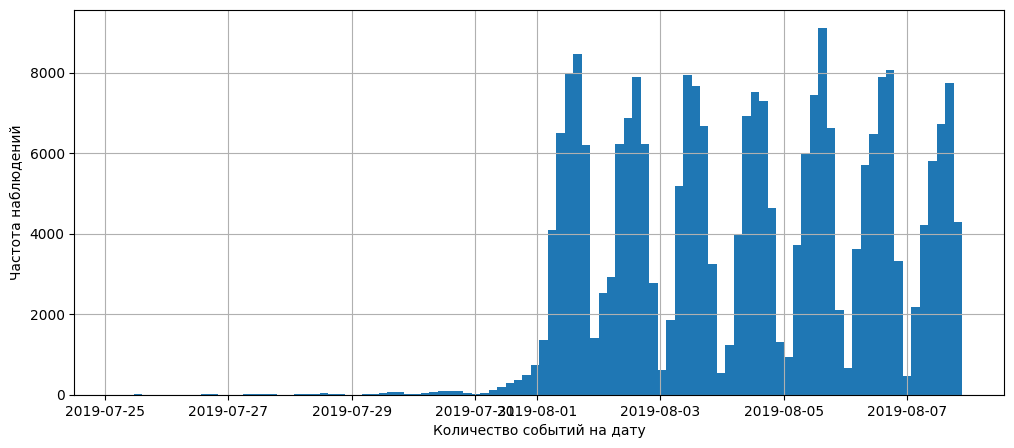

In [16]:
#Проверим как распределены события на даты на графике
plt.figure(figsize=(12,5))
data['event_timestamp'].hist(bins=100)
plt.xlabel('Количество событий на дату')
plt.ylabel('Частота наблюдений')

In [17]:
#Проверим как распределены события на даты в табличном виде
display(data['event_date'].value_counts())

event_date
2019-08-01 14:40:35    9
2019-08-04 16:23:19    9
2019-08-05 15:00:27    8
2019-08-07 11:18:41    8
2019-08-04 09:44:06    8
                      ..
2019-08-03 13:10:24    1
2019-08-03 13:10:43    1
2019-08-03 13:10:44    1
2019-08-03 13:10:45    1
2019-08-07 21:15:17    1
Name: count, Length: 176654, dtype: int64

По графику и таблице видно, что актуальным временным промежутком можно считать период с 01.08.2019 по 07.08.2019 - 7 дней.

In [18]:
#Обрежем наши данные до актуального периода
actual_data = data[data['event_date']>='2019-08-01']
actual_data['event_date'].value_counts()

event_date
2019-08-01 14:40:35    9
2019-08-04 16:23:19    9
2019-08-07 15:24:29    8
2019-08-05 15:00:27    8
2019-08-04 09:44:06    8
                      ..
2019-08-03 14:42:56    1
2019-08-03 14:42:54    1
2019-08-03 14:42:52    1
2019-08-03 14:42:51    1
2019-08-07 21:15:17    1
Name: count, Length: 174044, dtype: int64

Text(0, 0.5, 'Частота наблюдений')

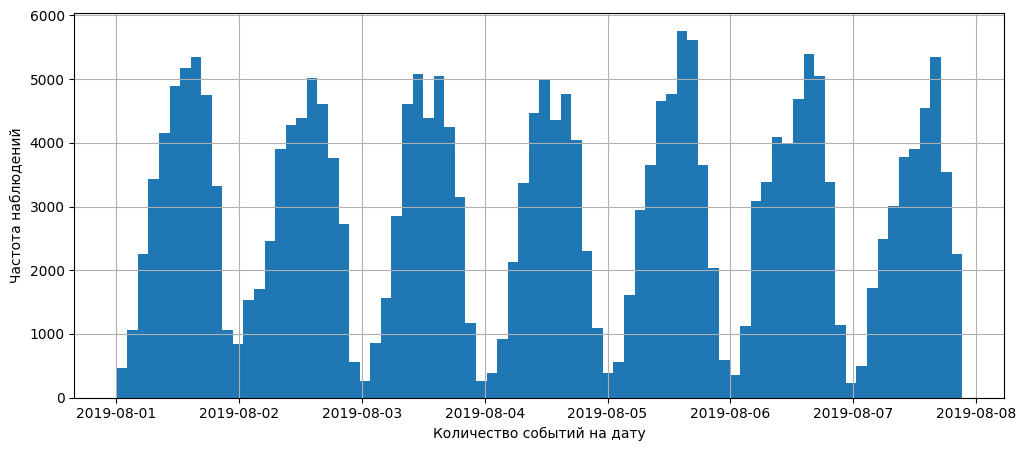

In [19]:
#Проверим как распределены события на даты на графике после того, как мы отбросили старые данные
plt.figure(figsize=(12,5))
actual_data['event_timestamp'].hist(bins=80)
plt.xlabel('Количество событий на дату')
plt.ylabel('Частота наблюдений')

Теперь события распределены по временному промежутку с 01.08.2019 по 07.08.2019 равномерно. Волнообразность гистограммы объясняется тем, что приложением обычно не пользуются ночью и ранним утром.

In [20]:
#Посчитаем количество событий в актуальной таблице и долю их потери после преобразования
print(actual_data['device_id_hash'].count())
print(actual_data['device_id_hash'].count()-data['device_id_hash'].count())
print(1-actual_data['device_id_hash'].count()/data['device_id_hash'].count())

241298
-2828
0.011584181938834814


In [21]:
#Посчитаем количество пользователей в актуальной таблице и долю их потери после преобразования
print(actual_data['device_id_hash'].nunique())
print(actual_data['device_id_hash'].nunique()-data['device_id_hash'].nunique())
print(1-actual_data['device_id_hash'].nunique()/data['device_id_hash'].nunique())

7534
-17
0.0022513574361011646


После того как мы отбросили старые данные, было потеряно 2828 событий (1,15%) и 17 уникальных пользователей (0,22%). Это небольшие допустимые потери.

### Группы и пользователи

Удостоверимся, что у нас есть события и пользователи на все три группы:
-  246, 247 - две контрольные группы A
- 248 - экспериментальная группа B

In [22]:
#Распределение событий по видам групп
actual_data['exp_id'].value_counts()

exp_id
248    84726
246    79425
247    77147
Name: count, dtype: int64

In [23]:
#Распределение уникальных пользователей по видам групп
actual_data.pivot_table(index='exp_id', values='device_id_hash', aggfunc='nunique').sort_values(
    by='device_id_hash', ascending=False).reset_index()

,exp_id,device_id_hash
0,248,2537
1,247,2513
2,246,2484


На все три группы имеются и события, и пользователи. В их распределении нет сильных перекосов.
Теперь нужно проверить, не попали ли какие-либо пользователи в несколько групп сразу.

In [24]:
#Проверяем наличие дулбирующихся пользоватетей
duplicated_users = actual_data.groupby('device_id_hash').agg({'exp_id':'nunique'}).reset_index()
duplicated_users[duplicated_users['exp_id']>=2].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   device_id_hash  0 non-null      int64
 1   exp_id          0 non-null      int64
dtypes: int64(2)
memory usage: 0.0 bytes


В данных нет пользователей, попавших сразу в несколько групп.

### Промежуточные выводы

- В среднем на каждого пользователя приходится 32 события, медианное значение - 20 событий. Есть пользователи с аномально большим количеством событий, максимальное количество событий на одного пользователя - 2308. Чаще всего один пользователь прошел через 5 событий. Аномальные значения удалять не будем, так мы можем потерять важные для исследования детали.

- Основная часть данных собрана с 01.08.2019 по 07.08.2019, поэтому июльские данные были вырезаны.

- У нас есть три группы: 246, 247 - две контрольные группы A, 248 - экспериментальная группа B. На все три группы есть и события, и пользователи. Нет пользователней, попавших в несколько групп сразу.

## Исследовательский анализ 

### Виды событий

Мы уже знаем, что приложение фиксирует 5 видов событий:
1. MainScreenAppear - просмотр главного экрана
2. Tutorial - просмотр обучающей части (онбординг)
3. CartScreenAppear - просмотр корзины
4. OffersScreenAppear - просмотр предложений 
5. PaymentScreenSuccessful - успешная оплата

Посмотрим как часто встречаются события в разрезе по видам.

In [25]:
#Посчитаем сколько событий приходится на каждый вид
actual_data['event_name'].value_counts()

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: count, dtype: int64

Text(0, 0.5, 'Виды событий')

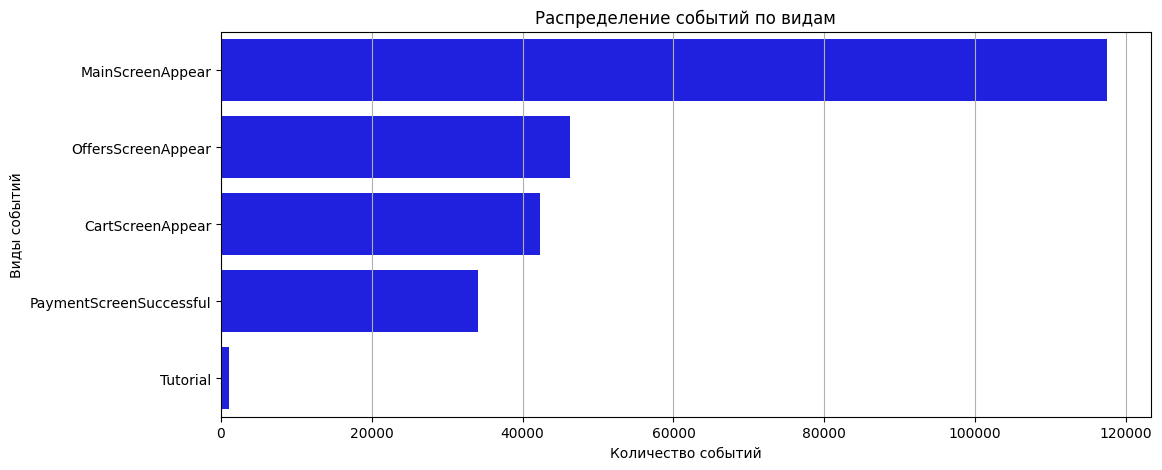

In [26]:
#Визуализируем на графике распределение событи по видам
#Создадим сводную таблицу
event_pivot = actual_data.pivot_table(
    index='event_name', values='device_id_hash', aggfunc='count').sort_values(
    by='device_id_hash', ascending=False).reset_index().rename_axis(None, axis=1)
event_pivot.columns = ['event_name', 'events']

#Выведем график c событиями по видам
plt.figure(figsize=(12,5))
plt.title('Распределение событий по видам')
plt.grid(True)
sns.barplot(data=event_pivot, color = 'blue', x='events', y='event_name')
plt.xlabel('Количество событий')
plt.ylabel('Виды событий')

Посмотрим сколько пользователей совершали каждое из этих событий, а также плсчитаем долю от общего числа пользователей.

                event_name  users
0         MainScreenAppear   7419
1       OffersScreenAppear   4593
2         CartScreenAppear   3734
3  PaymentScreenSuccessful   3539
4                 Tutorial    840


Text(0, 0.5, 'Виды событий')

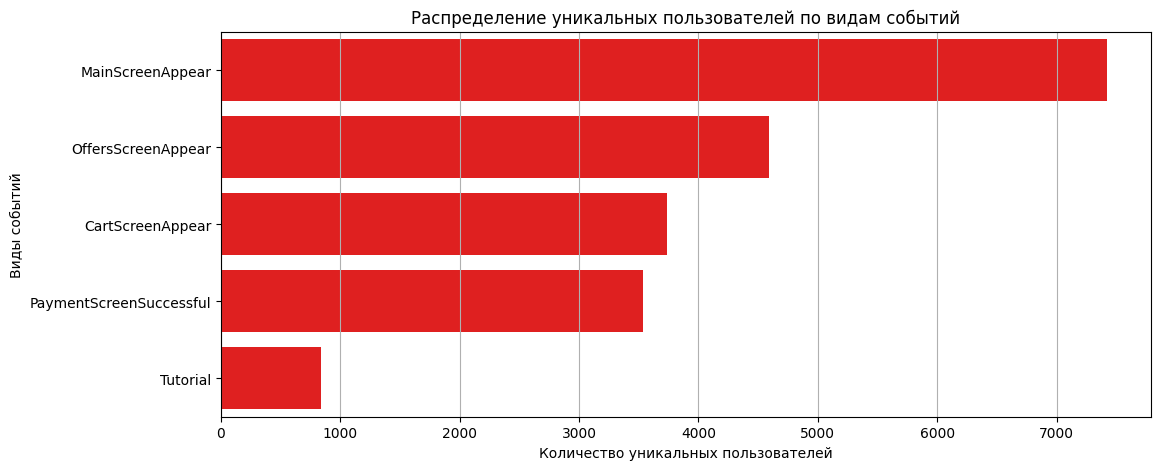

In [27]:
#Создадим сводную таблицу
event_users_pivot = actual_data.pivot_table(
    index='event_name', values='device_id_hash', aggfunc='nunique').sort_values(
    by='device_id_hash', ascending=False).reset_index()
event_users_pivot.columns = ['event_name', 'users']
print(event_users_pivot)

#Выведем график c числом уникальных пользователей по видам событий
plt.figure(figsize=(12,5))
plt.title('Распределение уникальных пользователей по видам событий')
plt.grid(True)
sns.barplot(data=event_users_pivot, color = 'red', x='users', y='event_name')
plt.xlabel('Количество уникальных пользователей')
plt.ylabel('Виды событий')

                event_name  users  users %
0         MainScreenAppear   7419    98.47
1       OffersScreenAppear   4593    60.96
2         CartScreenAppear   3734    49.56
3  PaymentScreenSuccessful   3539    46.97
4                 Tutorial    840    11.15


Text(0, 0.5, 'Виды событий')

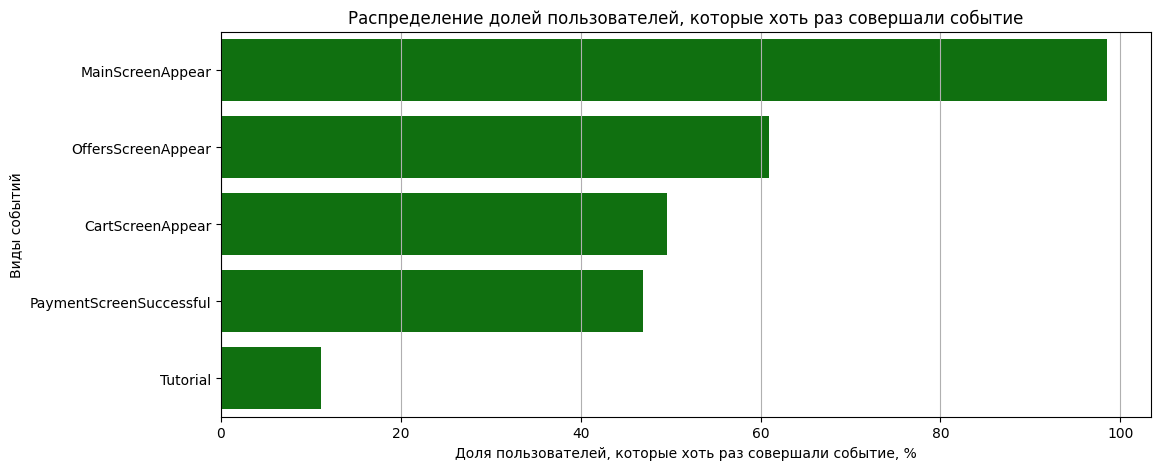

In [28]:
#Добавим столбец с долей пользователей, которые хоть раз совершали событие
event_users_pivot['users %'] = round(event_users_pivot['users'] / actual_data['device_id_hash'].nunique() * 100, 2)
print(event_users_pivot)

#Выведем график с долей пользователей, которые хоть раз совершали событие
plt.figure(figsize=(12,5))
plt.title('Распределение долей пользователей, которые хоть раз совершали событие')
plt.grid(True)
sns.barplot(data=event_users_pivot, color = 'green', x='users %', y='event_name')
plt.xlabel('Доля пользователей, которые хоть раз совершали событие, %')
plt.ylabel('Виды событий')

In [29]:
#Сведем обе таблицы в одну
event_data = event_pivot.merge(event_users_pivot, on='event_name')
event_data

,event_name,events,users,users %
0,MainScreenAppear,117431,7419,98.47
1,OffersScreenAppear,46350,4593,60.96
2,CartScreenAppear,42365,3734,49.56
3,PaymentScreenSuccessful,34113,3539,46.97
4,Tutorial,1039,840,11.15


### Воронка

#### Порядок событий в воронке

Смоделируем воронку, предположив в каком порядке происходят события.

В предыдущем этапе мы выяснили, что **при сортировке по убыванию и количества самих событий, и пользователей, и доле пользователей события складываются в такую очередность:**

1. MainScreenAppear - просмотр главного экрана
2. OffersScreenAppear - просмотр предложений
3. CartScreenAppear - просмотр корзины
4. PaymentScreenSuccessful - успешная оплата
5. Tutorial - просмотр обучающей части (онбординг)

Однако этап Tutorial (просмотр обучающей части (онбординг)) набирает слишком низкую популярность среди всех видов событий - всего 11% пользователей проходят через него.

Обычно этап с просмотром обучающей части встречается сразу при входе в приложение после установки до просмотра главного экрана. Обучающая часть включает в себя изучение интерфейса приложения, может быть оформлен в виде "слайдов", всплывающих окошек, указателей и т.п. Соответственно логично предположить, что этап прошли совершенно новые пользователи, которые попали в эксперимент. Tutorial не является элементом покупательской воронки, этот этап можно удалить.

In [30]:
#Убираем из воронки вид события Tutorial
event_data = event_data[event_data['event_name']!='Tutorial']
event_data

,event_name,events,users,users %
0,MainScreenAppear,117431,7419,98.47
1,OffersScreenAppear,46350,4593,60.96
2,CartScreenAppear,42365,3734,49.56
3,PaymentScreenSuccessful,34113,3539,46.97


In [51]:
#Визуализируем воронку
fig = go.Figure(go.Funnel(
    y = event_data['event_name'],
    x = event_data['users']))

fig.show()

Итак, тогда **путь пользователя** (customer journey map или CJM), разбитый на виды событий, выглядит таким образом:

1. Пользователь открывает приложение, отображается главный экран (MainScreenAppear)
2. Пользователь видит экран с предлагаемыми ему товарами (вероятно после поиска) (OffersScreenAppear)
3. Пользователь открывает корзину с выбранными товарами (CartScreenAppear)
4. Пользователь оплачивает товар и попадает в экран с успешной оплатой (PaymentScreenSuccessful)


#### Расчет конверсии по воронке

По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). Посчитаем отношение числа пользователей одного события к предыдущему. Так мы сможем понять на каком шаге теряется больше всего пользователей и какая доля пользователей доходит от первого события до оплаты.


In [ ]:
event_data['conversion %'] = round((100+event_data['users'].pct_change() * 100),2)
event_data = event_data.fillna(100)
event_data

/var/folders/q9/fh4pz5ns2xggjhgj1tgnr94c0000gn/T/ipykernel_40409/2485390046.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_name,events,users,users %,conversion %
0,MainScreenAppear,117431,7419,98.47,100.00
1,OffersScreenAppear,46350,4593,60.96,61.91
2,CartScreenAppear,42365,3734,49.56,81.30
3,PaymentScreenSuccessful,34113,3539,46.97,94.78


In [36]:
event_data['initial %'] = round((event_data['users'] / event_data.loc[0, 'users'])*100, 2)
event_data

,event_name,events,users,users %,conversion %,initial %
0,MainScreenAppear,117431,7419,98.47,100.00,100.00
1,OffersScreenAppear,46350,4593,60.96,61.91,61.91
2,CartScreenAppear,42365,3734,49.56,81.30,50.33
3,PaymentScreenSuccessful,34113,3539,46.97,94.78,47.70


**Выводы:**

- Почти **62% пользователей переходят с главного экрана на экран с предложениями продуктов**. Результат можно было бы интерпретировать как положительный или недостаточный, если бы в условии проекта была описана архитектура мобильного приложения. 
Обычно в приложениях для заказа продуктов питания пользователь заходит на главный экран, далее проходит в меню с категориями или пишет запрос в строку поиска. После этого обычнно должны выходить предложения продуктов. Так как основная функция самого мобильного приложения - заказ продуктов питания, то сомнительно, что пользователи в лишний раз заходят в него просто посмотреть главный экран. Поэтому 62% - **довольно низкий показатель.**

- **На экран корзины переходят 81% от предыдущего шага** с экраном предложений и **50% от главного экрана**. Значит половина пользователей набирают понравившиеся товары в корзину и заходят в нее. **Это хороший показатель.**

- **На экран с успешной оплатой переходит 95% от предыдущего шага** с просмотром корзины и **47% от числа пользователей на главном экране. Это отличный результат**, но стоит исследовать, куда уходит оставшиеся 5% - возможно у этих пользователей происходит неуспешная оплата.

- **Больше всего пользователей (38%) теряется на шаге от перехода с главного экрана на экран с предложениями товаров**. Могут быть следующие причины:
        - Пользователям не понятен или не приятен интерфейс приложения (не могут найти меню, поиск и пр.). Нужно провести UX-экспертизу и проверить всем ли новым пользователям виден онбординг (туториал).   
        - Пользователи не находят нужные товары и взамен этому приложение не показывает похожие товары. Вполне может быть, что человек ищет продукт конкретной марки, не находит и уходит из приложения, но потенциально он мог бы заказать и другой похожий товар. Тогда нужно настроить систему рекомендаций.
        - Пользователям не подходят цены, условия оплаты, доставки и пр. Это можно выяснить путем опроса.
        - В приложении есть технические баги, которые не дают пользователям успешно совершать поиск товаров. Например, если приложение "выкидывает", "зависает", медленно загружает страницы. Можно проанализировать регионы и типы устройств пользователей, которые теряются на этом шаге, провести тестирование, проанализировать обращения в техподдержку. 
        
- До успешной оплаты заказа доходит почти 48% пользователей, которые были на главной экране. В целом, показатель отличный. По результатам исследования в среднем [конверсия сектора за 2018 год составляла 19%](https://datainsight.ru/Grocery2018) без учёта трафика приложений.  

## A/A/B-тестирование

Ранее мы уже проверяли, что у нас есть пользователи на все три экспериментальные группы:

246, 247 - две контрольные группы A
248 - экспериментальная группа B

In [37]:
#Распределение уникальных пользователей по видам групп
exp_groups = actual_data.groupby('exp_id').agg({'device_id_hash':'nunique'}).reset_index()
#Добавляем столбец с объединенной контрольной группой
exp_groups.loc[3] = ['246+247', 4997]
exp_groups = exp_groups.set_index(exp_groups.columns[0])
exp_groups

,device_id_hash
exp_id,
246,2484
247,2513
248,2537
246+247,4997


In [38]:
#Создадим таблицу с количеством пользователей по видами событий в разбивке по группам
event_groups = actual_data.pivot_table(
    index='event_name', columns='exp_id', values='device_id_hash', aggfunc='nunique').sort_values(246, ascending=False)
event_groups

exp_id,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181
Tutorial,278,283,279


In [39]:
#Убираем из воронки вид события Tutorial
event_groups = event_groups.drop(['Tutorial'], axis = 0)
event_groups

exp_id,246,247,248
event_name,,,
MainScreenAppear,2450,2476,2493
OffersScreenAppear,1542,1520,1531
CartScreenAppear,1266,1238,1230
PaymentScreenSuccessful,1200,1158,1181


In [40]:
#Добавляем столбец с объединенной контрольной группой
event_groups['246+247'] = event_groups[246]+event_groups[247]
event_groups

exp_id,246,247,248,246+247
event_name,,,,
MainScreenAppear,2450,2476,2493,4926
OffersScreenAppear,1542,1520,1531,3062
CartScreenAppear,1266,1238,1230,2504
PaymentScreenSuccessful,1200,1158,1181,2358


**Сформулируем гипотезы:**

- H0 Нулевая гипотеза: Конверсия в обеих группах равна
- H1 Альтернативная гипотеза: Конверсия в обеих группах различается

**Подготовка к тестированию:**

У нас есть четыре события, и в ходе тестирования нужно будет сравнивать конверсии на всех четырех этапах. Значит нам предстоит провести четыре A/A-тестирования (между контрольными группами 246 и 247) и двенадцать A/B-тестирований (отдельно между 2 контрольными группами одной экспериментальной 248 группой, а также между объединенной группой и экспериментальной).

Это множественные сравнения, поэтому нужно применить поправку Бонферрони - статистическую значимость нужно "разбить" на количество сравнений. Их у нас в сумме 16 единиц, поэтому bonferroni_alpha = alpha / 16.

In [41]:
#Зададим формулу проверки статистической значимости между конверсиями 
#Используем метод Бонферрони для множественного сравнения
def z_test(group1, group2, event, alpha): 
    p1_event = event_groups.loc[event, group1]
    p2_event = event_groups.loc[event, group2] 
    p1_users = exp_groups.loc[group1, 'device_id_hash'] 
    p2_users = exp_groups.loc[group2, 'device_id_hash'] 
    p1 = p1_event / p1_users 
    p2 = p2_event / p2_users 
    p_combined = (p1_event + p2_event) / (p1_users + p2_users)
    difference = p1 - p2 
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / p1_users + 1 / p2_users))
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    bonferroni_alpha = alpha / 16
    
    print('Группы {} и {}, событие: {}, p-value: {p_value:.2f}'.format(group1, group2, event, p_value=p_value))
    if (p_value < bonferroni_alpha):
        print('Отвергаем нулевую гипотезу, конверсия в обеих группах различается')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна')

### A/A-тестирование

Критерии успешного A/A-теста:

- Количество пользователей в различных группах различается не более, чем на 1%;
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости;
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии исследуемой страницы в ходе одного исследования, неизвестно, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

Различие в количестве уникальных пользователей между контрольными группами 246 и 247 примерно равно 1,16% (при округлении до целого - 1%). Пользователей, входящих в разные группы нет. Далее прооверим есть ли различие по видам событий.

**Сформулируем гипотезы:**

- H0 Нулевая гипотеза: Конверсия в группах 246 и 247 равна
- H1 Альтернативная гипотеза: Конверсия в группах 246 и 247 различается

In [42]:
for event in event_groups.index:
    z_test(246, 247, event, 0.05)
    print()

Группы 246 и 247, событие: MainScreenAppear, p-value: 0.76
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 247, событие: OffersScreenAppear, p-value: 0.25
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 247, событие: CartScreenAppear, p-value: 0.23
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 247, событие: PaymentScreenSuccessful, p-value: 0.11
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна



**Вывод по A/A тестированию:**

После сравнения контрольных групп A убедились, что выборка и тест был проведен корректно и между группами нет статистически значимых различий.
Контрольные группы 246 и 247 по каждому событию показывают идентичные результаты, нулевую гипотезу отвергнуть не удалось.

### A/B-тестирование

Приступим к проверке результатов самого эксперимента с заменой шрифта в мобильном приложении.

Сравним контрольную группу 246 с экспериментальной группой 248. 

**Сформулируем гипотезы:**

- H0 Нулевая гипотеза: Конверсия в группах 246 и 248 равна
- H1 Альтернативная гипотеза: Конверсия в группах 246 и 248 различается

In [43]:
for event in event_groups.index:
    z_test(246, 248, event, 0.05)
    print()

Группы 246 и 248, событие: MainScreenAppear, p-value: 0.29
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 248, событие: OffersScreenAppear, p-value: 0.21
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 248, событие: CartScreenAppear, p-value: 0.08
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246 и 248, событие: PaymentScreenSuccessful, p-value: 0.21
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна



Сравним контрольную группу 247 с экспериментальной группой 248. 

**Сформулируем гипотезы:**

- H0 Нулевая гипотеза: Конверсия в группах 247 и 248 равна
- H1 Альтернативная гипотеза: Конверсия в группах 247 и 248 различается

In [44]:
for event in event_groups.index:
    z_test(247, 248, event, 0.05)
    print()

Группы 247 и 248, событие: MainScreenAppear, p-value: 0.46
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 247 и 248, событие: OffersScreenAppear, p-value: 0.92
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 247 и 248, событие: CartScreenAppear, p-value: 0.58
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 247 и 248, событие: PaymentScreenSuccessful, p-value: 0.74
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна



Сравним объединенную контрольную группу 246+247 с экспериментальной группой 248. 

**Сформулируем гипотезы:**

- H0 Нулевая гипотеза: Конверсия в группах 246+247 и 248 равна
- H1 Альтернативная гипотеза: Конверсия в группах 246+247 и 248 различается

In [45]:
for event in event_groups.index:
    z_test('246+247', 248, event, 0.05)
    print()

Группы 246+247 и 248, событие: MainScreenAppear, p-value: 0.29
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246+247 и 248, событие: OffersScreenAppear, p-value: 0.43
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246+247 и 248, событие: CartScreenAppear, p-value: 0.18
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна

Группы 246+247 и 248, событие: PaymentScreenSuccessful, p-value: 0.60
Не получилось отвергнуть нулевую гипотезу, конверсия в обеих группах равна



**Вывод по A/B тестированию:**

Между конверсией между контрольными и экспериментальной группами нет статистически значимых различий во всех случаях. Отвергнуть нулевую гипотезу не получилось.

Это значит, что **изменение шрифта в мобильном приложении не влияет на конверсию**.

### Пояснения к проведению тестирования

Для проведения тестирования была применена поправка Бонферрони, т.к. мы должны были провести множественные среавнения. В таком случае значение статистической значимости делится на количество сравнений (в нашем случае их было 16 - 4 A/A-тестирования и 12 A/B-тестирований). Уровень значимости alpha был выбран в размере 0.05.


## Выводы и рекомендации

На старте мы имели три датасета с данными о пользователях пазвлекательного мобильного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года: посещения, покупки и рекламные расходы на привлечение. Данные чистые, без пропусков и дубликатов. 

**Предобработка данных:**

- Названия столбцов перевели на змеиный регистр
- Пропуски не выявлены
- Формат даты и времени изменен на YYYY.MM.DD hh:mm:ss, добавлен столбец с датой в формате YYYY.MM.DD
- Выявлены 413 явных дубликатов, их решено оставить; неявных дубликатов нет

**Изучение и проверка данных:**

- В среднем на каждого пользователя приходится 32 события, медианное значение - 20 событий. Есть пользователи с аномально большим количеством событий, максимальное количество событий на одного пользователя - 2308. Чаще всего один пользователь прошел через 5 событий. Аномальные значения удалять не будем, так мы можем потерять важные для исследования детали.

- Основная часть данных собрана с 01.08.2019 по 07.08.2019, поэтому июльские данные были вырезаны.

- У нас есть три группы: 246, 247 - две контрольные группы A, 248 - экспериментальная группа B. На все три группы есть и события, и пользователи. Нет пользователней, попавших в несколько групп сразу.

**Исследовательский анализ:**

По количеству событий, пользователей, долей пользователей события складываются в такую очередность:

1. MainScreenAppear - просмотр главного экрана
2. OffersScreenAppear - просмотр предложений
3. CartScreenAppear - просмотр корзины
4. PaymentScreenSuccessful - успешная оплата
5. Tutorial - просмотр обучающей части (онбординг)

Этап Tutorial (просмотр обучающей части (онбординг)) вероятно проходят только новые пользователи, он не входит в покупательскую воронку, поэтому его удаляем и не включаем в воронку.

Путь пользователя (customer journey map или CJM) в приложении, разбитый на виды событий, выглядит таким образом:

1. Пользователь открывает приложение, отображается главный экран (MainScreenAppear)
2. Пользователь видит экран с предлагаемыми ему товарами (вероятно после поиска) (OffersScreenAppear)
3. Пользователь открывает корзину с выбранными товарами (CartScreenAppear)
4. Пользователь оплачивает товар и попадает в экран с успешной оплатой (PaymentScreenSuccessful)

- Почти **62% пользователей переходят с главного экрана на экран с предложениями продуктов**. Так как основная функция самого мобильного приложения - заказ продуктов питания, то сомнительно, что пользователи в лишний раз заходят в него просто полистать главный экран. Поэтому 62% - **довольно низкий показатель.**

- **На экран корзины переходят 81% от предыдущего шага** с экраном предложений и **50% от главного экрана**. Значит половина пользователей набирают понравившиеся товары в корзину и заходят в нее. **Это хороший показатель.**

- **На экран с успешной оплатой переходит 95% от предыдущего шага** с просмотром корзины и **47% от числа пользователей на главном экране. Это отличный результат**, но стоит исследовать, куда уходит оставшиеся 5% - возможно у этих пользователей происходит неуспешная оплата.

- **Больше всего пользователей (38%) теряется на шаге от перехода с главного экрана на экран с предложениями товаров**. Могут быть следующие причины:
        - Пользователям не понятен или не приятен интерфейс приложения (не могут найти меню, поиск и пр.). Нужно провести UX-экспертизу и проверить всем ли новым пользователям виден онбординг (туториал).   
        - Пользователи не находят нужные товары и взамен этому приложение не показывает похожие товары. Вполне может быть, что человек ищет продукт конкретной марки, не находит и уходит из приложения, но потенциально он мог бы заказать и другой похожий товар. Тогда нужно настроить систему рекомендаций.
        - Пользователям не подходят цены, условия оплаты, доставки и пр. Это можно выяснить путем опроса.
        - В приложении есть технические баги, которые не дают пользователям успешно совершать поиск товаров. Например, если приложение "выкидывает", "зависает", медленно загружает страницы. Можно проанализировать регионы и типы устройств пользователей, которые теряются на этом шаге, провести тестирование, проанализировать обращения в техподдержку. 
        
- До успешной оплаты заказа доходит почти 48% пользователей, которые были на главной экране. В целом, показатель отличный. По результатам исследования в среднем [конверсия сектора за 2018 год составляла 19%](https://datainsight.ru/Grocery2018) без учёта трафика приложений.  

**A/A-тестирование:**

После сравнения контрольных групп A убедились, что выборка и тест был проведен корректно и между группами нет статистически значимых различий. Контрольные группы по каждому событию показывают идентичные результаты, нулевую гипотезу отвергнуть не удалось.

**Вывод по A/B тестированию:**

Между конверсией между контрольными (в т.ч. с объединенной контрольной) и экспериментальной группами нет статистически значимых различий во всех случаях. Отвергнуть нулевую гипотезу не получилось. Это значит, что изменение шрифта в мобильном приложении не влияет на конверсию.

**Рекомендации для менеджеров:**

1. Эксперимент показал, что замена шрифта в приложении не влияет на метрику конверсии ни на одном из шагов воронки. Значит, шрифт можно менять, не боясь, что это решение будет влиять негативно на конверсию, но и не надеяться, что будет влиять на нее положительно.

2. Обратить внимание на отток пользователей, который происходит при переходе от главного экрана на экран с предложениями товаров:
        - Следует проанализировать регионы и типы устройств пользователей, которые теряются на этом шаге, провести тестирование, проанализировать обращения в техподдержку. 
        - Можно провести UX-экспертизу, а также проверить всем ли новым пользователям виден онбординг (туториал).   
        - Проверить как работает система рекомендаций и провести опрос пользователей.


